# Required Libraries

In [1]:

import numpy as np
import pandas as pd
import cv2
import sklearn
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mat_image
%matplotlib inline
from PIL import Image
from glob import glob
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# load haar cascade classifier
haar = cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')

pd.options.mode.chained_assignment = None  # default='warn'


# Image Croping

7000 7000


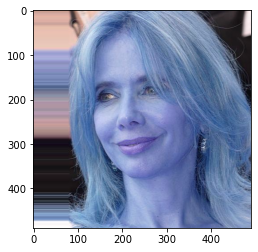

In [2]:
#loading images from dataset
femalepath = glob('./data/female/*.jpg')
malepath = glob('./data/male/*.jpg')
a = len(femalepath)
b = len(malepath)
print(a,b)

# let us consider one image
path = femalepath[0]
img = cv2.imread(path)

plt.imshow(img)
plt.show()

(489, 490)


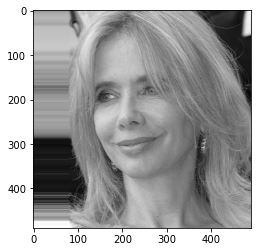

In [3]:
# convert image into grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray,cmap='gray')

[[ 86  86 273 273]]


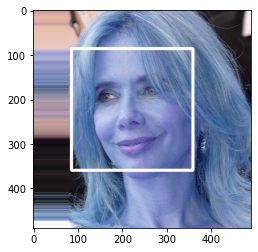

In [4]:
faces = haar.detectMultiScale(gray,1.5,5)
print(faces)

for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),5)
plt.imshow(img)

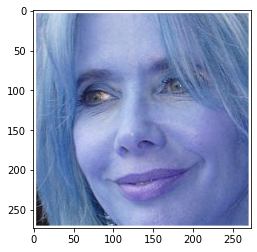

In [5]:
# crop the image
crop_img = img[y:y+h,x:x+h]
plt.imshow(crop_img)

In [6]:
# save the image
cv2.imwrite('f_01.png',crop_img)

True

In [7]:
# Apply to all the images
def extract_images(path,gender,i):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray,1.5,5)
    for x,y,w,h in faces:
        roi = img[y:y+h,x:x+w]
        if gender == 'male':
            cv2.imwrite('./data/crop/male_crop/{}_{}.png'.format(gender,i),roi)
        else:
            cv2.imwrite('./data/crop/female_crop/{}_{}.png'.format(gender,i),roi)

In [8]:
extract_images(femalepath[0],'female',1)

In [9]:
for i,path in enumerate(femalepath):
    try:

        extract_images(path,'female',i)
        print('INFO: {}/{} processed sucessfully'.format(i,len(femalepath)))
        
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(femalepath)))

INFO: 0/7000 processed sucessfully
INFO: 1/7000 processed sucessfully
INFO: 2/7000 processed sucessfully
INFO: 3/7000 processed sucessfully
INFO: 4/7000 processed sucessfully
INFO: 5/7000 processed sucessfully
INFO: 6/7000 processed sucessfully
INFO: 7/7000 processed sucessfully
INFO: 8/7000 processed sucessfully
INFO: 9/7000 processed sucessfully
INFO: 10/7000 processed sucessfully
INFO: 11/7000 processed sucessfully
INFO: 12/7000 processed sucessfully
INFO: 13/7000 processed sucessfully
INFO: 14/7000 processed sucessfully
INFO: 15/7000 processed sucessfully
INFO: 16/7000 processed sucessfully
INFO: 17/7000 processed sucessfully
INFO: 18/7000 processed sucessfully
INFO: 19/7000 processed sucessfully
INFO: 20/7000 processed sucessfully
INFO: 21/7000 processed sucessfully
INFO: 22/7000 processed sucessfully
INFO: 23/7000 processed sucessfully
INFO: 24/7000 processed sucessfully
INFO: 25/7000 processed sucessfully
INFO: 26/7000 processed sucessfully
INFO: 27/7000 processed sucessfully
IN

INFO: 225/7000 processed sucessfully
INFO: 226/7000 processed sucessfully
INFO: 227/7000 processed sucessfully
INFO: 228/7000 processed sucessfully
INFO: 229/7000 processed sucessfully
INFO: 230/7000 processed sucessfully
INFO: 231/7000 processed sucessfully
INFO: 232/7000 processed sucessfully
INFO: 233/7000 processed sucessfully
INFO: 234/7000 processed sucessfully
INFO: 235/7000 processed sucessfully
INFO: 236/7000 processed sucessfully
INFO: 237/7000 processed sucessfully
INFO: 238/7000 processed sucessfully
INFO: 239/7000 processed sucessfully
INFO: 240/7000 processed sucessfully
INFO: 241/7000 processed sucessfully
INFO: 242/7000 processed sucessfully
INFO: 243/7000 processed sucessfully
INFO: 244/7000 processed sucessfully
INFO: 245/7000 processed sucessfully
INFO: 246/7000 processed sucessfully
INFO: 247/7000 processed sucessfully
INFO: 248/7000 processed sucessfully
INFO: 249/7000 processed sucessfully
INFO: 250/7000 processed sucessfully
INFO: 251/7000 processed sucessfully
I

INFO: 449/7000 processed sucessfully
INFO: 450/7000 processed sucessfully
INFO: 451/7000 processed sucessfully
INFO: 452/7000 processed sucessfully
INFO: 453/7000 processed sucessfully
INFO: 454/7000 processed sucessfully
INFO: 455/7000 processed sucessfully
INFO: 456/7000 processed sucessfully
INFO: 457/7000 processed sucessfully
INFO: 458/7000 processed sucessfully
INFO: 459/7000 processed sucessfully
INFO: 460/7000 processed sucessfully
INFO: 461/7000 processed sucessfully
INFO: 462/7000 processed sucessfully
INFO: 463/7000 processed sucessfully
INFO: 464/7000 processed sucessfully
INFO: 465/7000 processed sucessfully
INFO: 466/7000 processed sucessfully
INFO: 467/7000 processed sucessfully
INFO: 468/7000 processed sucessfully
INFO: 469/7000 processed sucessfully
INFO: 470/7000 processed sucessfully
INFO: 471/7000 processed sucessfully
INFO: 472/7000 processed sucessfully
INFO: 473/7000 processed sucessfully
INFO: 474/7000 processed sucessfully
INFO: 475/7000 processed sucessfully
I

INFO: 678/7000 processed sucessfully
INFO: 679/7000 processed sucessfully
INFO: 680/7000 processed sucessfully
INFO: 681/7000 processed sucessfully
INFO: 682/7000 processed sucessfully
INFO: 683/7000 processed sucessfully
INFO: 684/7000 processed sucessfully
INFO: 685/7000 processed sucessfully
INFO: 686/7000 processed sucessfully
INFO: 687/7000 processed sucessfully
INFO: 688/7000 processed sucessfully
INFO: 689/7000 processed sucessfully
INFO: 690/7000 processed sucessfully
INFO: 691/7000 processed sucessfully
INFO: 692/7000 processed sucessfully
INFO: 693/7000 processed sucessfully
INFO: 694/7000 processed sucessfully
INFO: 695/7000 processed sucessfully
INFO: 696/7000 processed sucessfully
INFO: 697/7000 processed sucessfully
INFO: 698/7000 processed sucessfully
INFO: 699/7000 processed sucessfully
INFO: 700/7000 processed sucessfully
INFO: 701/7000 processed sucessfully
INFO: 702/7000 processed sucessfully
INFO: 703/7000 processed sucessfully
INFO: 704/7000 processed sucessfully
I

INFO: 902/7000 processed sucessfully
INFO: 903/7000 processed sucessfully
INFO: 904/7000 processed sucessfully
INFO: 905/7000 processed sucessfully
INFO: 906/7000 processed sucessfully
INFO: 907/7000 processed sucessfully
INFO: 908/7000 processed sucessfully
INFO: 909/7000 processed sucessfully
INFO: 910/7000 processed sucessfully
INFO: 911/7000 processed sucessfully
INFO: 912/7000 processed sucessfully
INFO: 913/7000 processed sucessfully
INFO: 914/7000 processed sucessfully
INFO: 915/7000 processed sucessfully
INFO: 916/7000 processed sucessfully
INFO: 917/7000 processed sucessfully
INFO: 918/7000 processed sucessfully
INFO: 919/7000 processed sucessfully
INFO: 920/7000 processed sucessfully
INFO: 921/7000 processed sucessfully
INFO: 922/7000 processed sucessfully
INFO: 923/7000 processed sucessfully
INFO: 924/7000 processed sucessfully
INFO: 925/7000 processed sucessfully
INFO: 926/7000 processed sucessfully
INFO: 927/7000 processed sucessfully
INFO: 928/7000 processed sucessfully
I

INFO: 1140/7000 processed sucessfully
INFO: 1141/7000 processed sucessfully
INFO: 1142/7000 processed sucessfully
INFO: 1143/7000 processed sucessfully
INFO: 1144/7000 processed sucessfully
INFO: 1145/7000 processed sucessfully
INFO: 1146/7000 processed sucessfully
INFO: 1147/7000 processed sucessfully
INFO: 1148/7000 processed sucessfully
INFO: 1149/7000 processed sucessfully
INFO: 1150/7000 processed sucessfully
INFO: 1151/7000 processed sucessfully
INFO: 1152/7000 processed sucessfully
INFO: 1153/7000 processed sucessfully
INFO: 1154/7000 processed sucessfully
INFO: 1155/7000 processed sucessfully
INFO: 1156/7000 processed sucessfully
INFO: 1157/7000 processed sucessfully
INFO: 1158/7000 processed sucessfully
INFO: 1159/7000 processed sucessfully
INFO: 1160/7000 processed sucessfully
INFO: 1161/7000 processed sucessfully
INFO: 1162/7000 processed sucessfully
INFO: 1163/7000 processed sucessfully
INFO: 1164/7000 processed sucessfully
INFO: 1165/7000 processed sucessfully
INFO: 1166/7

INFO: 1369/7000 processed sucessfully
INFO: 1370/7000 processed sucessfully
INFO: 1371/7000 processed sucessfully
INFO: 1372/7000 processed sucessfully
INFO: 1373/7000 processed sucessfully
INFO: 1374/7000 processed sucessfully
INFO: 1375/7000 processed sucessfully
INFO: 1376/7000 processed sucessfully
INFO: 1377/7000 processed sucessfully
INFO: 1378/7000 processed sucessfully
INFO: 1379/7000 processed sucessfully
INFO: 1380/7000 processed sucessfully
INFO: 1381/7000 processed sucessfully
INFO: 1382/7000 processed sucessfully
INFO: 1383/7000 processed sucessfully
INFO: 1384/7000 processed sucessfully
INFO: 1385/7000 processed sucessfully
INFO: 1386/7000 processed sucessfully
INFO: 1387/7000 processed sucessfully
INFO: 1388/7000 processed sucessfully
INFO: 1389/7000 processed sucessfully
INFO: 1390/7000 processed sucessfully
INFO: 1391/7000 processed sucessfully
INFO: 1392/7000 processed sucessfully
INFO: 1393/7000 processed sucessfully
INFO: 1394/7000 processed sucessfully
INFO: 1395/7

INFO: 1593/7000 processed sucessfully
INFO: 1594/7000 processed sucessfully
INFO: 1595/7000 processed sucessfully
INFO: 1596/7000 processed sucessfully
INFO: 1597/7000 processed sucessfully
INFO: 1598/7000 processed sucessfully
INFO: 1599/7000 processed sucessfully
INFO: 1600/7000 processed sucessfully
INFO: 1601/7000 processed sucessfully
INFO: 1602/7000 processed sucessfully
INFO: 1603/7000 processed sucessfully
INFO: 1604/7000 processed sucessfully
INFO: 1605/7000 processed sucessfully
INFO: 1606/7000 processed sucessfully
INFO: 1607/7000 processed sucessfully
INFO: 1608/7000 processed sucessfully
INFO: 1609/7000 processed sucessfully
INFO: 1610/7000 processed sucessfully
INFO: 1611/7000 processed sucessfully
INFO: 1612/7000 processed sucessfully
INFO: 1613/7000 processed sucessfully
INFO: 1614/7000 processed sucessfully
INFO: 1615/7000 processed sucessfully
INFO: 1616/7000 processed sucessfully
INFO: 1617/7000 processed sucessfully
INFO: 1618/7000 processed sucessfully
INFO: 1619/7

INFO: 1817/7000 processed sucessfully
INFO: 1818/7000 processed sucessfully
INFO: 1819/7000 processed sucessfully
INFO: 1820/7000 processed sucessfully
INFO: 1821/7000 processed sucessfully
INFO: 1822/7000 processed sucessfully
INFO: 1823/7000 processed sucessfully
INFO: 1824/7000 processed sucessfully
INFO: 1825/7000 processed sucessfully
INFO: 1826/7000 processed sucessfully
INFO: 1827/7000 processed sucessfully
INFO: 1828/7000 processed sucessfully
INFO: 1829/7000 processed sucessfully
INFO: 1830/7000 processed sucessfully
INFO: 1831/7000 processed sucessfully
INFO: 1832/7000 processed sucessfully
INFO: 1833/7000 processed sucessfully
INFO: 1834/7000 processed sucessfully
INFO: 1835/7000 processed sucessfully
INFO: 1836/7000 processed sucessfully
INFO: 1837/7000 processed sucessfully
INFO: 1838/7000 processed sucessfully
INFO: 1839/7000 processed sucessfully
INFO: 1840/7000 processed sucessfully
INFO: 1841/7000 processed sucessfully
INFO: 1842/7000 processed sucessfully
INFO: 1843/7

INFO: 2041/7000 processed sucessfully
INFO: 2042/7000 processed sucessfully
INFO: 2043/7000 processed sucessfully
INFO: 2044/7000 processed sucessfully
INFO: 2045/7000 processed sucessfully
INFO: 2046/7000 processed sucessfully
INFO: 2047/7000 processed sucessfully
INFO: 2048/7000 processed sucessfully
INFO: 2049/7000 processed sucessfully
INFO: 2050/7000 processed sucessfully
INFO: 2051/7000 processed sucessfully
INFO: 2052/7000 processed sucessfully
INFO: 2053/7000 processed sucessfully
INFO: 2054/7000 processed sucessfully
INFO: 2055/7000 processed sucessfully
INFO: 2056/7000 processed sucessfully
INFO: 2057/7000 processed sucessfully
INFO: 2058/7000 processed sucessfully
INFO: 2059/7000 processed sucessfully
INFO: 2060/7000 processed sucessfully
INFO: 2061/7000 processed sucessfully
INFO: 2062/7000 processed sucessfully
INFO: 2063/7000 processed sucessfully
INFO: 2064/7000 processed sucessfully
INFO: 2065/7000 processed sucessfully
INFO: 2066/7000 processed sucessfully
INFO: 2067/7

INFO: 2267/7000 processed sucessfully
INFO: 2268/7000 processed sucessfully
INFO: 2269/7000 processed sucessfully
INFO: 2270/7000 processed sucessfully
INFO: 2271/7000 processed sucessfully
INFO: 2272/7000 processed sucessfully
INFO: 2273/7000 processed sucessfully
INFO: 2274/7000 processed sucessfully
INFO: 2275/7000 processed sucessfully
INFO: 2276/7000 processed sucessfully
INFO: 2277/7000 processed sucessfully
INFO: 2278/7000 processed sucessfully
INFO: 2279/7000 processed sucessfully
INFO: 2280/7000 processed sucessfully
INFO: 2281/7000 processed sucessfully
INFO: 2282/7000 processed sucessfully
INFO: 2283/7000 processed sucessfully
INFO: 2284/7000 processed sucessfully
INFO: 2285/7000 processed sucessfully
INFO: 2286/7000 processed sucessfully
INFO: 2287/7000 processed sucessfully
INFO: 2288/7000 processed sucessfully
INFO: 2289/7000 processed sucessfully
INFO: 2290/7000 processed sucessfully
INFO: 2291/7000 processed sucessfully
INFO: 2292/7000 processed sucessfully
INFO: 2293/7

INFO: 2493/7000 processed sucessfully
INFO: 2494/7000 processed sucessfully
INFO: 2495/7000 processed sucessfully
INFO: 2496/7000 processed sucessfully
INFO: 2497/7000 processed sucessfully
INFO: 2498/7000 processed sucessfully
INFO: 2499/7000 processed sucessfully
INFO: 2500/7000 processed sucessfully
INFO: 2501/7000 processed sucessfully
INFO: 2502/7000 processed sucessfully
INFO: 2503/7000 processed sucessfully
INFO: 2504/7000 processed sucessfully
INFO: 2505/7000 processed sucessfully
INFO: 2506/7000 processed sucessfully
INFO: 2507/7000 processed sucessfully
INFO: 2508/7000 processed sucessfully
INFO: 2509/7000 processed sucessfully
INFO: 2510/7000 processed sucessfully
INFO: 2511/7000 processed sucessfully
INFO: 2512/7000 processed sucessfully
INFO: 2513/7000 processed sucessfully
INFO: 2514/7000 processed sucessfully
INFO: 2515/7000 processed sucessfully
INFO: 2516/7000 processed sucessfully
INFO: 2517/7000 processed sucessfully
INFO: 2518/7000 processed sucessfully
INFO: 2519/7

INFO: 2711/7000 processed sucessfully
INFO: 2712/7000 processed sucessfully
INFO: 2713/7000 processed sucessfully
INFO: 2714/7000 processed sucessfully
INFO: 2715/7000 processed sucessfully
INFO: 2716/7000 processed sucessfully
INFO: 2717/7000 processed sucessfully
INFO: 2718/7000 processed sucessfully
INFO: 2719/7000 processed sucessfully
INFO: 2720/7000 processed sucessfully
INFO: 2721/7000 processed sucessfully
INFO: 2722/7000 processed sucessfully
INFO: 2723/7000 processed sucessfully
INFO: 2724/7000 processed sucessfully
INFO: 2725/7000 processed sucessfully
INFO: 2726/7000 processed sucessfully
INFO: 2727/7000 processed sucessfully
INFO: 2728/7000 processed sucessfully
INFO: 2729/7000 processed sucessfully
INFO: 2730/7000 processed sucessfully
INFO: 2731/7000 processed sucessfully
INFO: 2732/7000 processed sucessfully
INFO: 2733/7000 processed sucessfully
INFO: 2734/7000 processed sucessfully
INFO: 2735/7000 processed sucessfully
INFO: 2736/7000 processed sucessfully
INFO: 2737/7

INFO: 2930/7000 processed sucessfully
INFO: 2931/7000 processed sucessfully
INFO: 2932/7000 processed sucessfully
INFO: 2933/7000 processed sucessfully
INFO: 2934/7000 processed sucessfully
INFO: 2935/7000 processed sucessfully
INFO: 2936/7000 processed sucessfully
INFO: 2937/7000 processed sucessfully
INFO: 2938/7000 processed sucessfully
INFO: 2939/7000 processed sucessfully
INFO: 2940/7000 processed sucessfully
INFO: 2941/7000 processed sucessfully
INFO: 2942/7000 processed sucessfully
INFO: 2943/7000 processed sucessfully
INFO: 2944/7000 processed sucessfully
INFO: 2945/7000 processed sucessfully
INFO: 2946/7000 processed sucessfully
INFO: 2947/7000 processed sucessfully
INFO: 2948/7000 processed sucessfully
INFO: 2949/7000 processed sucessfully
INFO: 2950/7000 processed sucessfully
INFO: 2951/7000 processed sucessfully
INFO: 2952/7000 processed sucessfully
INFO: 2953/7000 processed sucessfully
INFO: 2954/7000 processed sucessfully
INFO: 2955/7000 processed sucessfully
INFO: 2956/7

INFO: 3148/7000 processed sucessfully
INFO: 3149/7000 processed sucessfully
INFO: 3150/7000 processed sucessfully
INFO: 3151/7000 processed sucessfully
INFO: 3152/7000 processed sucessfully
INFO: 3153/7000 processed sucessfully
INFO: 3154/7000 processed sucessfully
INFO: 3155/7000 processed sucessfully
INFO: 3156/7000 processed sucessfully
INFO: 3157/7000 processed sucessfully
INFO: 3158/7000 processed sucessfully
INFO: 3159/7000 processed sucessfully
INFO: 3160/7000 processed sucessfully
INFO: 3161/7000 processed sucessfully
INFO: 3162/7000 processed sucessfully
INFO: 3163/7000 processed sucessfully
INFO: 3164/7000 processed sucessfully
INFO: 3165/7000 processed sucessfully
INFO: 3166/7000 processed sucessfully
INFO: 3167/7000 processed sucessfully
INFO: 3168/7000 processed sucessfully
INFO: 3169/7000 processed sucessfully
INFO: 3170/7000 processed sucessfully
INFO: 3171/7000 processed sucessfully
INFO: 3172/7000 processed sucessfully
INFO: 3173/7000 processed sucessfully
INFO: 3174/7

INFO: 3369/7000 processed sucessfully
INFO: 3370/7000 processed sucessfully
INFO: 3371/7000 processed sucessfully
INFO: 3372/7000 processed sucessfully
INFO: 3373/7000 processed sucessfully
INFO: 3374/7000 processed sucessfully
INFO: 3375/7000 processed sucessfully
INFO: 3376/7000 processed sucessfully
INFO: 3377/7000 processed sucessfully
INFO: 3378/7000 processed sucessfully
INFO: 3379/7000 processed sucessfully
INFO: 3380/7000 processed sucessfully
INFO: 3381/7000 processed sucessfully
INFO: 3382/7000 processed sucessfully
INFO: 3383/7000 processed sucessfully
INFO: 3384/7000 processed sucessfully
INFO: 3385/7000 processed sucessfully
INFO: 3386/7000 processed sucessfully
INFO: 3387/7000 processed sucessfully
INFO: 3388/7000 processed sucessfully
INFO: 3389/7000 processed sucessfully
INFO: 3390/7000 processed sucessfully
INFO: 3391/7000 processed sucessfully
INFO: 3392/7000 processed sucessfully
INFO: 3393/7000 processed sucessfully
INFO: 3394/7000 processed sucessfully
INFO: 3395/7

INFO: 3593/7000 processed sucessfully
INFO: 3594/7000 processed sucessfully
INFO: 3595/7000 processed sucessfully
INFO: 3596/7000 processed sucessfully
INFO: 3597/7000 processed sucessfully
INFO: 3598/7000 processed sucessfully
INFO: 3599/7000 processed sucessfully
INFO: 3600/7000 processed sucessfully
INFO: 3601/7000 processed sucessfully
INFO: 3602/7000 processed sucessfully
INFO: 3603/7000 processed sucessfully
INFO: 3604/7000 processed sucessfully
INFO: 3605/7000 processed sucessfully
INFO: 3606/7000 processed sucessfully
INFO: 3607/7000 processed sucessfully
INFO: 3608/7000 processed sucessfully
INFO: 3609/7000 processed sucessfully
INFO: 3610/7000 processed sucessfully
INFO: 3611/7000 processed sucessfully
INFO: 3612/7000 processed sucessfully
INFO: 3613/7000 processed sucessfully
INFO: 3614/7000 processed sucessfully
INFO: 3615/7000 processed sucessfully
INFO: 3616/7000 processed sucessfully
INFO: 3617/7000 processed sucessfully
INFO: 3618/7000 processed sucessfully
INFO: 3619/7

INFO: 3809/7000 processed sucessfully
INFO: 3810/7000 processed sucessfully
INFO: 3811/7000 processed sucessfully
INFO: 3812/7000 processed sucessfully
INFO: 3813/7000 processed sucessfully
INFO: 3814/7000 processed sucessfully
INFO: 3815/7000 processed sucessfully
INFO: 3816/7000 processed sucessfully
INFO: 3817/7000 processed sucessfully
INFO: 3818/7000 processed sucessfully
INFO: 3819/7000 processed sucessfully
INFO: 3820/7000 processed sucessfully
INFO: 3821/7000 processed sucessfully
INFO: 3822/7000 processed sucessfully
INFO: 3823/7000 processed sucessfully
INFO: 3824/7000 processed sucessfully
INFO: 3825/7000 processed sucessfully
INFO: 3826/7000 processed sucessfully
INFO: 3827/7000 processed sucessfully
INFO: 3828/7000 processed sucessfully
INFO: 3829/7000 processed sucessfully
INFO: 3830/7000 processed sucessfully
INFO: 3831/7000 processed sucessfully
INFO: 3832/7000 processed sucessfully
INFO: 3833/7000 processed sucessfully
INFO: 3834/7000 processed sucessfully
INFO: 3835/7

INFO: 4036/7000 processed sucessfully
INFO: 4037/7000 processed sucessfully
INFO: 4038/7000 processed sucessfully
INFO: 4039/7000 processed sucessfully
INFO: 4040/7000 processed sucessfully
INFO: 4041/7000 processed sucessfully
INFO: 4042/7000 processed sucessfully
INFO: 4043/7000 processed sucessfully
INFO: 4044/7000 processed sucessfully
INFO: 4045/7000 processed sucessfully
INFO: 4046/7000 processed sucessfully
INFO: 4047/7000 processed sucessfully
INFO: 4048/7000 processed sucessfully
INFO: 4049/7000 processed sucessfully
INFO: 4050/7000 processed sucessfully
INFO: 4051/7000 processed sucessfully
INFO: 4052/7000 processed sucessfully
INFO: 4053/7000 processed sucessfully
INFO: 4054/7000 processed sucessfully
INFO: 4055/7000 processed sucessfully
INFO: 4056/7000 processed sucessfully
INFO: 4057/7000 processed sucessfully
INFO: 4058/7000 processed sucessfully
INFO: 4059/7000 processed sucessfully
INFO: 4060/7000 processed sucessfully
INFO: 4061/7000 processed sucessfully
INFO: 4062/7

INFO: 4265/7000 processed sucessfully
INFO: 4266/7000 processed sucessfully
INFO: 4267/7000 processed sucessfully
INFO: 4268/7000 processed sucessfully
INFO: 4269/7000 processed sucessfully
INFO: 4270/7000 processed sucessfully
INFO: 4271/7000 processed sucessfully
INFO: 4272/7000 processed sucessfully
INFO: 4273/7000 processed sucessfully
INFO: 4274/7000 processed sucessfully
INFO: 4275/7000 processed sucessfully
INFO: 4276/7000 processed sucessfully
INFO: 4277/7000 processed sucessfully
INFO: 4278/7000 processed sucessfully
INFO: 4279/7000 processed sucessfully
INFO: 4280/7000 processed sucessfully
INFO: 4281/7000 processed sucessfully
INFO: 4282/7000 processed sucessfully
INFO: 4283/7000 processed sucessfully
INFO: 4284/7000 processed sucessfully
INFO: 4285/7000 processed sucessfully
INFO: 4286/7000 processed sucessfully
INFO: 4287/7000 processed sucessfully
INFO: 4288/7000 processed sucessfully
INFO: 4289/7000 processed sucessfully
INFO: 4290/7000 processed sucessfully
INFO: 4291/7

INFO: 4483/7000 processed sucessfully
INFO: 4484/7000 processed sucessfully
INFO: 4485/7000 processed sucessfully
INFO: 4486/7000 processed sucessfully
INFO: 4487/7000 processed sucessfully
INFO: 4488/7000 processed sucessfully
INFO: 4489/7000 processed sucessfully
INFO: 4490/7000 processed sucessfully
INFO: 4491/7000 processed sucessfully
INFO: 4492/7000 processed sucessfully
INFO: 4493/7000 processed sucessfully
INFO: 4494/7000 processed sucessfully
INFO: 4495/7000 processed sucessfully
INFO: 4496/7000 processed sucessfully
INFO: 4497/7000 processed sucessfully
INFO: 4498/7000 processed sucessfully
INFO: 4499/7000 processed sucessfully
INFO: 4500/7000 processed sucessfully
INFO: 4501/7000 processed sucessfully
INFO: 4502/7000 processed sucessfully
INFO: 4503/7000 processed sucessfully
INFO: 4504/7000 processed sucessfully
INFO: 4505/7000 processed sucessfully
INFO: 4506/7000 processed sucessfully
INFO: 4507/7000 processed sucessfully
INFO: 4508/7000 processed sucessfully
INFO: 4509/7

INFO: 4705/7000 processed sucessfully
INFO: 4706/7000 processed sucessfully
INFO: 4707/7000 processed sucessfully
INFO: 4708/7000 processed sucessfully
INFO: 4709/7000 processed sucessfully
INFO: 4710/7000 processed sucessfully
INFO: 4711/7000 processed sucessfully
INFO: 4712/7000 processed sucessfully
INFO: 4713/7000 processed sucessfully
INFO: 4714/7000 processed sucessfully
INFO: 4715/7000 processed sucessfully
INFO: 4716/7000 processed sucessfully
INFO: 4717/7000 processed sucessfully
INFO: 4718/7000 processed sucessfully
INFO: 4719/7000 processed sucessfully
INFO: 4720/7000 processed sucessfully
INFO: 4721/7000 processed sucessfully
INFO: 4722/7000 processed sucessfully
INFO: 4723/7000 processed sucessfully
INFO: 4724/7000 processed sucessfully
INFO: 4725/7000 processed sucessfully
INFO: 4726/7000 processed sucessfully
INFO: 4727/7000 processed sucessfully
INFO: 4728/7000 processed sucessfully
INFO: 4729/7000 processed sucessfully
INFO: 4730/7000 processed sucessfully
INFO: 4731/7

INFO: 4925/7000 processed sucessfully
INFO: 4926/7000 processed sucessfully
INFO: 4927/7000 processed sucessfully
INFO: 4928/7000 processed sucessfully
INFO: 4929/7000 processed sucessfully
INFO: 4930/7000 processed sucessfully
INFO: 4931/7000 processed sucessfully
INFO: 4932/7000 processed sucessfully
INFO: 4933/7000 processed sucessfully
INFO: 4934/7000 processed sucessfully
INFO: 4935/7000 processed sucessfully
INFO: 4936/7000 processed sucessfully
INFO: 4937/7000 processed sucessfully
INFO: 4938/7000 processed sucessfully
INFO: 4939/7000 processed sucessfully
INFO: 4940/7000 processed sucessfully
INFO: 4941/7000 processed sucessfully
INFO: 4942/7000 processed sucessfully
INFO: 4943/7000 processed sucessfully
INFO: 4944/7000 processed sucessfully
INFO: 4945/7000 processed sucessfully
INFO: 4946/7000 processed sucessfully
INFO: 4947/7000 processed sucessfully
INFO: 4948/7000 processed sucessfully
INFO: 4949/7000 processed sucessfully
INFO: 4950/7000 processed sucessfully
INFO: 4951/7

INFO: 5143/7000 processed sucessfully
INFO: 5144/7000 processed sucessfully
INFO: 5145/7000 processed sucessfully
INFO: 5146/7000 processed sucessfully
INFO: 5147/7000 processed sucessfully
INFO: 5148/7000 processed sucessfully
INFO: 5149/7000 processed sucessfully
INFO: 5150/7000 processed sucessfully
INFO: 5151/7000 processed sucessfully
INFO: 5152/7000 processed sucessfully
INFO: 5153/7000 processed sucessfully
INFO: 5154/7000 processed sucessfully
INFO: 5155/7000 processed sucessfully
INFO: 5156/7000 processed sucessfully
INFO: 5157/7000 processed sucessfully
INFO: 5158/7000 processed sucessfully
INFO: 5159/7000 processed sucessfully
INFO: 5160/7000 processed sucessfully
INFO: 5161/7000 processed sucessfully
INFO: 5162/7000 processed sucessfully
INFO: 5163/7000 processed sucessfully
INFO: 5164/7000 processed sucessfully
INFO: 5165/7000 processed sucessfully
INFO: 5166/7000 processed sucessfully
INFO: 5167/7000 processed sucessfully
INFO: 5168/7000 processed sucessfully
INFO: 5169/7

INFO: 5361/7000 processed sucessfully
INFO: 5362/7000 processed sucessfully
INFO: 5363/7000 processed sucessfully
INFO: 5364/7000 processed sucessfully
INFO: 5365/7000 processed sucessfully
INFO: 5366/7000 processed sucessfully
INFO: 5367/7000 processed sucessfully
INFO: 5368/7000 processed sucessfully
INFO: 5369/7000 processed sucessfully
INFO: 5370/7000 processed sucessfully
INFO: 5371/7000 processed sucessfully
INFO: 5372/7000 processed sucessfully
INFO: 5373/7000 processed sucessfully
INFO: 5374/7000 processed sucessfully
INFO: 5375/7000 processed sucessfully
INFO: 5376/7000 processed sucessfully
INFO: 5377/7000 processed sucessfully
INFO: 5378/7000 processed sucessfully
INFO: 5379/7000 processed sucessfully
INFO: 5380/7000 processed sucessfully
INFO: 5381/7000 processed sucessfully
INFO: 5382/7000 processed sucessfully
INFO: 5383/7000 processed sucessfully
INFO: 5384/7000 processed sucessfully
INFO: 5385/7000 processed sucessfully
INFO: 5386/7000 processed sucessfully
INFO: 5387/7

INFO: 5579/7000 processed sucessfully
INFO: 5580/7000 processed sucessfully
INFO: 5581/7000 processed sucessfully
INFO: 5582/7000 processed sucessfully
INFO: 5583/7000 processed sucessfully
INFO: 5584/7000 processed sucessfully
INFO: 5585/7000 processed sucessfully
INFO: 5586/7000 processed sucessfully
INFO: 5587/7000 processed sucessfully
INFO: 5588/7000 processed sucessfully
INFO: 5589/7000 processed sucessfully
INFO: 5590/7000 processed sucessfully
INFO: 5591/7000 processed sucessfully
INFO: 5592/7000 processed sucessfully
INFO: 5593/7000 processed sucessfully
INFO: 5594/7000 processed sucessfully
INFO: 5595/7000 processed sucessfully
INFO: 5596/7000 processed sucessfully
INFO: 5597/7000 processed sucessfully
INFO: 5598/7000 processed sucessfully
INFO: 5599/7000 processed sucessfully
INFO: 5600/7000 processed sucessfully
INFO: 5601/7000 processed sucessfully
INFO: 5602/7000 processed sucessfully
INFO: 5603/7000 processed sucessfully
INFO: 5604/7000 processed sucessfully
INFO: 5605/7

INFO: 5809/7000 processed sucessfully
INFO: 5810/7000 processed sucessfully
INFO: 5811/7000 processed sucessfully
INFO: 5812/7000 processed sucessfully
INFO: 5813/7000 processed sucessfully
INFO: 5814/7000 processed sucessfully
INFO: 5815/7000 processed sucessfully
INFO: 5816/7000 processed sucessfully
INFO: 5817/7000 processed sucessfully
INFO: 5818/7000 processed sucessfully
INFO: 5819/7000 processed sucessfully
INFO: 5820/7000 processed sucessfully
INFO: 5821/7000 processed sucessfully
INFO: 5822/7000 processed sucessfully
INFO: 5823/7000 processed sucessfully
INFO: 5824/7000 processed sucessfully
INFO: 5825/7000 processed sucessfully
INFO: 5826/7000 processed sucessfully
INFO: 5827/7000 processed sucessfully
INFO: 5828/7000 processed sucessfully
INFO: 5829/7000 processed sucessfully
INFO: 5830/7000 processed sucessfully
INFO: 5831/7000 processed sucessfully
INFO: 5832/7000 processed sucessfully
INFO: 5833/7000 processed sucessfully
INFO: 5834/7000 processed sucessfully
INFO: 5835/7

INFO: 6039/7000 processed sucessfully
INFO: 6040/7000 processed sucessfully
INFO: 6041/7000 processed sucessfully
INFO: 6042/7000 processed sucessfully
INFO: 6043/7000 processed sucessfully
INFO: 6044/7000 processed sucessfully
INFO: 6045/7000 processed sucessfully
INFO: 6046/7000 processed sucessfully
INFO: 6047/7000 processed sucessfully
INFO: 6048/7000 processed sucessfully
INFO: 6049/7000 processed sucessfully
INFO: 6050/7000 processed sucessfully
INFO: 6051/7000 processed sucessfully
INFO: 6052/7000 processed sucessfully
INFO: 6053/7000 processed sucessfully
INFO: 6054/7000 processed sucessfully
INFO: 6055/7000 processed sucessfully
INFO: 6056/7000 processed sucessfully
INFO: 6057/7000 processed sucessfully
INFO: 6058/7000 processed sucessfully
INFO: 6059/7000 processed sucessfully
INFO: 6060/7000 processed sucessfully
INFO: 6061/7000 processed sucessfully
INFO: 6062/7000 processed sucessfully
INFO: 6063/7000 processed sucessfully
INFO: 6064/7000 processed sucessfully
INFO: 6065/7

INFO: 6259/7000 processed sucessfully
INFO: 6260/7000 processed sucessfully
INFO: 6261/7000 processed sucessfully
INFO: 6262/7000 processed sucessfully
INFO: 6263/7000 processed sucessfully
INFO: 6264/7000 processed sucessfully
INFO: 6265/7000 processed sucessfully
INFO: 6266/7000 processed sucessfully
INFO: 6267/7000 processed sucessfully
INFO: 6268/7000 processed sucessfully
INFO: 6269/7000 processed sucessfully
INFO: 6270/7000 processed sucessfully
INFO: 6271/7000 processed sucessfully
INFO: 6272/7000 processed sucessfully
INFO: 6273/7000 processed sucessfully
INFO: 6274/7000 processed sucessfully
INFO: 6275/7000 processed sucessfully
INFO: 6276/7000 processed sucessfully
INFO: 6277/7000 processed sucessfully
INFO: 6278/7000 processed sucessfully
INFO: 6279/7000 processed sucessfully
INFO: 6280/7000 processed sucessfully
INFO: 6281/7000 processed sucessfully
INFO: 6282/7000 processed sucessfully
INFO: 6283/7000 processed sucessfully
INFO: 6284/7000 processed sucessfully
INFO: 6285/7

INFO: 6482/7000 processed sucessfully
INFO: 6483/7000 processed sucessfully
INFO: 6484/7000 processed sucessfully
INFO: 6485/7000 processed sucessfully
INFO: 6486/7000 processed sucessfully
INFO: 6487/7000 processed sucessfully
INFO: 6488/7000 processed sucessfully
INFO: 6489/7000 processed sucessfully
INFO: 6490/7000 processed sucessfully
INFO: 6491/7000 processed sucessfully
INFO: 6492/7000 processed sucessfully
INFO: 6493/7000 processed sucessfully
INFO: 6494/7000 processed sucessfully
INFO: 6495/7000 processed sucessfully
INFO: 6496/7000 processed sucessfully
INFO: 6497/7000 processed sucessfully
INFO: 6498/7000 processed sucessfully
INFO: 6499/7000 processed sucessfully
INFO: 6500/7000 processed sucessfully
INFO: 6501/7000 processed sucessfully
INFO: 6502/7000 processed sucessfully
INFO: 6503/7000 processed sucessfully
INFO: 6504/7000 processed sucessfully
INFO: 6505/7000 processed sucessfully
INFO: 6506/7000 processed sucessfully
INFO: 6507/7000 processed sucessfully
INFO: 6508/7

INFO: 6704/7000 processed sucessfully
INFO: 6705/7000 processed sucessfully
INFO: 6706/7000 processed sucessfully
INFO: 6707/7000 processed sucessfully
INFO: 6708/7000 processed sucessfully
INFO: 6709/7000 processed sucessfully
INFO: 6710/7000 processed sucessfully
INFO: 6711/7000 processed sucessfully
INFO: 6712/7000 processed sucessfully
INFO: 6713/7000 processed sucessfully
INFO: 6714/7000 processed sucessfully
INFO: 6715/7000 processed sucessfully
INFO: 6716/7000 processed sucessfully
INFO: 6717/7000 processed sucessfully
INFO: 6718/7000 processed sucessfully
INFO: 6719/7000 processed sucessfully
INFO: 6720/7000 processed sucessfully
INFO: 6721/7000 processed sucessfully
INFO: 6722/7000 processed sucessfully
INFO: 6723/7000 processed sucessfully
INFO: 6724/7000 processed sucessfully
INFO: 6725/7000 processed sucessfully
INFO: 6726/7000 processed sucessfully
INFO: 6727/7000 processed sucessfully
INFO: 6728/7000 processed sucessfully
INFO: 6729/7000 processed sucessfully
INFO: 6730/7

INFO: 6922/7000 processed sucessfully
INFO: 6923/7000 processed sucessfully
INFO: 6924/7000 processed sucessfully
INFO: 6925/7000 processed sucessfully
INFO: 6926/7000 processed sucessfully
INFO: 6927/7000 processed sucessfully
INFO: 6928/7000 processed sucessfully
INFO: 6929/7000 processed sucessfully
INFO: 6930/7000 processed sucessfully
INFO: 6931/7000 processed sucessfully
INFO: 6932/7000 processed sucessfully
INFO: 6933/7000 processed sucessfully
INFO: 6934/7000 processed sucessfully
INFO: 6935/7000 processed sucessfully
INFO: 6936/7000 processed sucessfully
INFO: 6937/7000 processed sucessfully
INFO: 6938/7000 processed sucessfully
INFO: 6939/7000 processed sucessfully
INFO: 6940/7000 processed sucessfully
INFO: 6941/7000 processed sucessfully
INFO: 6942/7000 processed sucessfully
INFO: 6943/7000 processed sucessfully
INFO: 6944/7000 processed sucessfully
INFO: 6945/7000 processed sucessfully
INFO: 6946/7000 processed sucessfully
INFO: 6947/7000 processed sucessfully
INFO: 6948/7

In [10]:
for i,path in enumerate(malepath):
    try:

        extract_images(path,'male',i)
        print('INFO: {}/{} processed sucessfully'.format(i,len(malepath)))
        
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(malepath)))

INFO: 0/7000 processed sucessfully
INFO: 1/7000 processed sucessfully
INFO: 2/7000 processed sucessfully
INFO: 3/7000 processed sucessfully
INFO: 4/7000 processed sucessfully
INFO: 5/7000 processed sucessfully
INFO: 6/7000 processed sucessfully
INFO: 7/7000 processed sucessfully
INFO: 8/7000 processed sucessfully
INFO: 9/7000 processed sucessfully
INFO: 10/7000 processed sucessfully
INFO: 11/7000 processed sucessfully
INFO: 12/7000 processed sucessfully
INFO: 13/7000 processed sucessfully
INFO: 14/7000 processed sucessfully
INFO: 15/7000 processed sucessfully
INFO: 16/7000 processed sucessfully
INFO: 17/7000 processed sucessfully
INFO: 18/7000 processed sucessfully
INFO: 19/7000 processed sucessfully
INFO: 20/7000 processed sucessfully
INFO: 21/7000 processed sucessfully
INFO: 22/7000 processed sucessfully
INFO: 23/7000 processed sucessfully
INFO: 24/7000 processed sucessfully
INFO: 25/7000 processed sucessfully
INFO: 26/7000 processed sucessfully
INFO: 27/7000 processed sucessfully
IN

INFO: 232/7000 processed sucessfully
INFO: 233/7000 processed sucessfully
INFO: 234/7000 processed sucessfully
INFO: 235/7000 processed sucessfully
INFO: 236/7000 processed sucessfully
INFO: 237/7000 processed sucessfully
INFO: 238/7000 processed sucessfully
INFO: 239/7000 processed sucessfully
INFO: 240/7000 processed sucessfully
INFO: 241/7000 processed sucessfully
INFO: 242/7000 processed sucessfully
INFO: 243/7000 processed sucessfully
INFO: 244/7000 processed sucessfully
INFO: 245/7000 processed sucessfully
INFO: 246/7000 processed sucessfully
INFO: 247/7000 processed sucessfully
INFO: 248/7000 processed sucessfully
INFO: 249/7000 processed sucessfully
INFO: 250/7000 processed sucessfully
INFO: 251/7000 processed sucessfully
INFO: 252/7000 processed sucessfully
INFO: 253/7000 processed sucessfully
INFO: 254/7000 processed sucessfully
INFO: 255/7000 processed sucessfully
INFO: 256/7000 processed sucessfully
INFO: 257/7000 processed sucessfully
INFO: 258/7000 processed sucessfully
I

INFO: 465/7000 processed sucessfully
INFO: 466/7000 processed sucessfully
INFO: 467/7000 processed sucessfully
INFO: 468/7000 processed sucessfully
INFO: 469/7000 processed sucessfully
INFO: 470/7000 processed sucessfully
INFO: 471/7000 processed sucessfully
INFO: 472/7000 processed sucessfully
INFO: 473/7000 processed sucessfully
INFO: 474/7000 processed sucessfully
INFO: 475/7000 processed sucessfully
INFO: 476/7000 processed sucessfully
INFO: 477/7000 processed sucessfully
INFO: 478/7000 processed sucessfully
INFO: 479/7000 processed sucessfully
INFO: 480/7000 processed sucessfully
INFO: 481/7000 processed sucessfully
INFO: 482/7000 processed sucessfully
INFO: 483/7000 processed sucessfully
INFO: 484/7000 processed sucessfully
INFO: 485/7000 processed sucessfully
INFO: 486/7000 processed sucessfully
INFO: 487/7000 processed sucessfully
INFO: 488/7000 processed sucessfully
INFO: 489/7000 processed sucessfully
INFO: 490/7000 processed sucessfully
INFO: 491/7000 processed sucessfully
I

INFO: 696/7000 processed sucessfully
INFO: 697/7000 processed sucessfully
INFO: 698/7000 processed sucessfully
INFO: 699/7000 processed sucessfully
INFO: 700/7000 processed sucessfully
INFO: 701/7000 processed sucessfully
INFO: 702/7000 processed sucessfully
INFO: 703/7000 processed sucessfully
INFO: 704/7000 processed sucessfully
INFO: 705/7000 processed sucessfully
INFO: 706/7000 processed sucessfully
INFO: 707/7000 processed sucessfully
INFO: 708/7000 processed sucessfully
INFO: 709/7000 processed sucessfully
INFO: 710/7000 processed sucessfully
INFO: 711/7000 processed sucessfully
INFO: 712/7000 processed sucessfully
INFO: 713/7000 processed sucessfully
INFO: 714/7000 processed sucessfully
INFO: 715/7000 processed sucessfully
INFO: 716/7000 processed sucessfully
INFO: 717/7000 processed sucessfully
INFO: 718/7000 processed sucessfully
INFO: 719/7000 processed sucessfully
INFO: 720/7000 processed sucessfully
INFO: 721/7000 processed sucessfully
INFO: 722/7000 processed sucessfully
I

INFO: 930/7000 processed sucessfully
INFO: 931/7000 processed sucessfully
INFO: 932/7000 processed sucessfully
INFO: 933/7000 processed sucessfully
INFO: 934/7000 processed sucessfully
INFO: 935/7000 processed sucessfully
INFO: 936/7000 processed sucessfully
INFO: 937/7000 processed sucessfully
INFO: 938/7000 processed sucessfully
INFO: 939/7000 processed sucessfully
INFO: 940/7000 processed sucessfully
INFO: 941/7000 processed sucessfully
INFO: 942/7000 processed sucessfully
INFO: 943/7000 processed sucessfully
INFO: 944/7000 processed sucessfully
INFO: 945/7000 processed sucessfully
INFO: 946/7000 processed sucessfully
INFO: 947/7000 processed sucessfully
INFO: 948/7000 processed sucessfully
INFO: 949/7000 processed sucessfully
INFO: 950/7000 processed sucessfully
INFO: 951/7000 processed sucessfully
INFO: 952/7000 processed sucessfully
INFO: 953/7000 processed sucessfully
INFO: 954/7000 processed sucessfully
INFO: 955/7000 processed sucessfully
INFO: 956/7000 processed sucessfully
I

INFO: 1154/7000 processed sucessfully
INFO: 1155/7000 processed sucessfully
INFO: 1156/7000 processed sucessfully
INFO: 1157/7000 processed sucessfully
INFO: 1158/7000 processed sucessfully
INFO: 1159/7000 processed sucessfully
INFO: 1160/7000 processed sucessfully
INFO: 1161/7000 processed sucessfully
INFO: 1162/7000 processed sucessfully
INFO: 1163/7000 processed sucessfully
INFO: 1164/7000 processed sucessfully
INFO: 1165/7000 processed sucessfully
INFO: 1166/7000 processed sucessfully
INFO: 1167/7000 processed sucessfully
INFO: 1168/7000 processed sucessfully
INFO: 1169/7000 processed sucessfully
INFO: 1170/7000 processed sucessfully
INFO: 1171/7000 processed sucessfully
INFO: 1172/7000 processed sucessfully
INFO: 1173/7000 processed sucessfully
INFO: 1174/7000 processed sucessfully
INFO: 1175/7000 processed sucessfully
INFO: 1176/7000 processed sucessfully
INFO: 1177/7000 processed sucessfully
INFO: 1178/7000 processed sucessfully
INFO: 1179/7000 processed sucessfully
INFO: 1180/7

INFO: 1596/7000 processed sucessfully
INFO: 1597/7000 processed sucessfully
INFO: 1598/7000 processed sucessfully
INFO: 1599/7000 processed sucessfully
INFO: 1600/7000 processed sucessfully
INFO: 1601/7000 processed sucessfully
INFO: 1602/7000 processed sucessfully
INFO: 1603/7000 processed sucessfully
INFO: 1604/7000 processed sucessfully
INFO: 1605/7000 processed sucessfully
INFO: 1606/7000 processed sucessfully
INFO: 1607/7000 processed sucessfully
INFO: 1608/7000 processed sucessfully
INFO: 1609/7000 processed sucessfully
INFO: 1610/7000 processed sucessfully
INFO: 1611/7000 processed sucessfully
INFO: 1612/7000 processed sucessfully
INFO: 1613/7000 processed sucessfully
INFO: 1614/7000 processed sucessfully
INFO: 1615/7000 processed sucessfully
INFO: 1616/7000 processed sucessfully
INFO: 1617/7000 processed sucessfully
INFO: 1618/7000 processed sucessfully
INFO: 1619/7000 processed sucessfully
INFO: 1620/7000 processed sucessfully
INFO: 1621/7000 processed sucessfully
INFO: 1622/7

INFO: 1812/7000 processed sucessfully
INFO: 1813/7000 processed sucessfully
INFO: 1814/7000 processed sucessfully
INFO: 1815/7000 processed sucessfully
INFO: 1816/7000 processed sucessfully
INFO: 1817/7000 processed sucessfully
INFO: 1818/7000 processed sucessfully
INFO: 1819/7000 processed sucessfully
INFO: 1820/7000 processed sucessfully
INFO: 1821/7000 processed sucessfully
INFO: 1822/7000 processed sucessfully
INFO: 1823/7000 processed sucessfully
INFO: 1824/7000 processed sucessfully
INFO: 1825/7000 processed sucessfully
INFO: 1826/7000 processed sucessfully
INFO: 1827/7000 processed sucessfully
INFO: 1828/7000 processed sucessfully
INFO: 1829/7000 processed sucessfully
INFO: 1830/7000 processed sucessfully
INFO: 1831/7000 processed sucessfully
INFO: 1832/7000 processed sucessfully
INFO: 1833/7000 processed sucessfully
INFO: 1834/7000 processed sucessfully
INFO: 1835/7000 processed sucessfully
INFO: 1836/7000 processed sucessfully
INFO: 1837/7000 processed sucessfully
INFO: 1838/7

INFO: 2035/7000 processed sucessfully
INFO: 2036/7000 processed sucessfully
INFO: 2037/7000 processed sucessfully
INFO: 2038/7000 processed sucessfully
INFO: 2039/7000 processed sucessfully
INFO: 2040/7000 processed sucessfully
INFO: 2041/7000 processed sucessfully
INFO: 2042/7000 processed sucessfully
INFO: 2043/7000 processed sucessfully
INFO: 2044/7000 processed sucessfully
INFO: 2045/7000 processed sucessfully
INFO: 2046/7000 processed sucessfully
INFO: 2047/7000 processed sucessfully
INFO: 2048/7000 processed sucessfully
INFO: 2049/7000 processed sucessfully
INFO: 2050/7000 processed sucessfully
INFO: 2051/7000 processed sucessfully
INFO: 2052/7000 processed sucessfully
INFO: 2053/7000 processed sucessfully
INFO: 2054/7000 processed sucessfully
INFO: 2055/7000 processed sucessfully
INFO: 2056/7000 processed sucessfully
INFO: 2057/7000 processed sucessfully
INFO: 2058/7000 processed sucessfully
INFO: 2059/7000 processed sucessfully
INFO: 2060/7000 processed sucessfully
INFO: 2061/7

INFO: 2264/7000 processed sucessfully
INFO: 2265/7000 processed sucessfully
INFO: 2266/7000 processed sucessfully
INFO: 2267/7000 processed sucessfully
INFO: 2268/7000 processed sucessfully
INFO: 2269/7000 processed sucessfully
INFO: 2270/7000 processed sucessfully
INFO: 2271/7000 processed sucessfully
INFO: 2272/7000 processed sucessfully
INFO: 2273/7000 processed sucessfully
INFO: 2274/7000 processed sucessfully
INFO: 2275/7000 processed sucessfully
INFO: 2276/7000 processed sucessfully
INFO: 2277/7000 processed sucessfully
INFO: 2278/7000 processed sucessfully
INFO: 2279/7000 processed sucessfully
INFO: 2280/7000 processed sucessfully
INFO: 2281/7000 processed sucessfully
INFO: 2282/7000 processed sucessfully
INFO: 2283/7000 processed sucessfully
INFO: 2284/7000 processed sucessfully
INFO: 2285/7000 processed sucessfully
INFO: 2286/7000 processed sucessfully
INFO: 2287/7000 processed sucessfully
INFO: 2288/7000 processed sucessfully
INFO: 2289/7000 processed sucessfully
INFO: 2290/7

INFO: 2480/7000 processed sucessfully
INFO: 2481/7000 processed sucessfully
INFO: 2482/7000 processed sucessfully
INFO: 2483/7000 processed sucessfully
INFO: 2484/7000 processed sucessfully
INFO: 2485/7000 processed sucessfully
INFO: 2486/7000 processed sucessfully
INFO: 2487/7000 processed sucessfully
INFO: 2488/7000 processed sucessfully
INFO: 2489/7000 processed sucessfully
INFO: 2490/7000 processed sucessfully
INFO: 2491/7000 processed sucessfully
INFO: 2492/7000 processed sucessfully
INFO: 2493/7000 processed sucessfully
INFO: 2494/7000 processed sucessfully
INFO: 2495/7000 processed sucessfully
INFO: 2496/7000 processed sucessfully
INFO: 2497/7000 processed sucessfully
INFO: 2498/7000 processed sucessfully
INFO: 2499/7000 processed sucessfully
INFO: 2500/7000 processed sucessfully
INFO: 2501/7000 processed sucessfully
INFO: 2502/7000 processed sucessfully
INFO: 2503/7000 processed sucessfully
INFO: 2504/7000 processed sucessfully
INFO: 2505/7000 processed sucessfully
INFO: 2506/7

INFO: 2709/7000 processed sucessfully
INFO: 2710/7000 processed sucessfully
INFO: 2711/7000 processed sucessfully
INFO: 2712/7000 processed sucessfully
INFO: 2713/7000 processed sucessfully
INFO: 2714/7000 processed sucessfully
INFO: 2715/7000 processed sucessfully
INFO: 2716/7000 processed sucessfully
INFO: 2717/7000 processed sucessfully
INFO: 2718/7000 processed sucessfully
INFO: 2719/7000 processed sucessfully
INFO: 2720/7000 processed sucessfully
INFO: 2721/7000 processed sucessfully
INFO: 2722/7000 processed sucessfully
INFO: 2723/7000 processed sucessfully
INFO: 2724/7000 processed sucessfully
INFO: 2725/7000 processed sucessfully
INFO: 2726/7000 processed sucessfully
INFO: 2727/7000 processed sucessfully
INFO: 2728/7000 processed sucessfully
INFO: 2729/7000 processed sucessfully
INFO: 2730/7000 processed sucessfully
INFO: 2731/7000 processed sucessfully
INFO: 2732/7000 processed sucessfully
INFO: 2733/7000 processed sucessfully
INFO: 2734/7000 processed sucessfully
INFO: 2735/7

INFO: 2946/7000 processed sucessfully
INFO: 2947/7000 processed sucessfully
INFO: 2948/7000 processed sucessfully
INFO: 2949/7000 processed sucessfully
INFO: 2950/7000 processed sucessfully
INFO: 2951/7000 processed sucessfully
INFO: 2952/7000 processed sucessfully
INFO: 2953/7000 processed sucessfully
INFO: 2954/7000 processed sucessfully
INFO: 2955/7000 processed sucessfully
INFO: 2956/7000 processed sucessfully
INFO: 2957/7000 processed sucessfully
INFO: 2958/7000 processed sucessfully
INFO: 2959/7000 processed sucessfully
INFO: 2960/7000 processed sucessfully
INFO: 2961/7000 processed sucessfully
INFO: 2962/7000 processed sucessfully
INFO: 2963/7000 processed sucessfully
INFO: 2964/7000 processed sucessfully
INFO: 2965/7000 processed sucessfully
INFO: 2966/7000 processed sucessfully
INFO: 2967/7000 processed sucessfully
INFO: 2968/7000 processed sucessfully
INFO: 2969/7000 processed sucessfully
INFO: 2970/7000 processed sucessfully
INFO: 2971/7000 processed sucessfully
INFO: 2972/7

INFO: 3180/7000 processed sucessfully
INFO: 3181/7000 processed sucessfully
INFO: 3182/7000 processed sucessfully
INFO: 3183/7000 processed sucessfully
INFO: 3184/7000 processed sucessfully
INFO: 3185/7000 processed sucessfully
INFO: 3186/7000 processed sucessfully
INFO: 3187/7000 processed sucessfully
INFO: 3188/7000 processed sucessfully
INFO: 3189/7000 processed sucessfully
INFO: 3190/7000 processed sucessfully
INFO: 3191/7000 processed sucessfully
INFO: 3192/7000 processed sucessfully
INFO: 3193/7000 processed sucessfully
INFO: 3194/7000 processed sucessfully
INFO: 3195/7000 processed sucessfully
INFO: 3196/7000 processed sucessfully
INFO: 3197/7000 processed sucessfully
INFO: 3198/7000 processed sucessfully
INFO: 3199/7000 processed sucessfully
INFO: 3200/7000 processed sucessfully
INFO: 3201/7000 processed sucessfully
INFO: 3202/7000 processed sucessfully
INFO: 3203/7000 processed sucessfully
INFO: 3204/7000 processed sucessfully
INFO: 3205/7000 processed sucessfully
INFO: 3206/7

INFO: 3396/7000 processed sucessfully
INFO: 3397/7000 processed sucessfully
INFO: 3398/7000 processed sucessfully
INFO: 3399/7000 processed sucessfully
INFO: 3400/7000 processed sucessfully
INFO: 3401/7000 processed sucessfully
INFO: 3402/7000 processed sucessfully
INFO: 3403/7000 processed sucessfully
INFO: 3404/7000 processed sucessfully
INFO: 3405/7000 processed sucessfully
INFO: 3406/7000 processed sucessfully
INFO: 3407/7000 processed sucessfully
INFO: 3408/7000 processed sucessfully
INFO: 3409/7000 processed sucessfully
INFO: 3410/7000 processed sucessfully
INFO: 3411/7000 processed sucessfully
INFO: 3412/7000 processed sucessfully
INFO: 3413/7000 processed sucessfully
INFO: 3414/7000 processed sucessfully
INFO: 3415/7000 processed sucessfully
INFO: 3416/7000 processed sucessfully
INFO: 3417/7000 processed sucessfully
INFO: 3418/7000 processed sucessfully
INFO: 3419/7000 processed sucessfully
INFO: 3420/7000 processed sucessfully
INFO: 3421/7000 processed sucessfully
INFO: 3422/7

INFO: 3613/7000 processed sucessfully
INFO: 3614/7000 processed sucessfully
INFO: 3615/7000 processed sucessfully
INFO: 3616/7000 processed sucessfully
INFO: 3617/7000 processed sucessfully
INFO: 3618/7000 processed sucessfully
INFO: 3619/7000 processed sucessfully
INFO: 3620/7000 processed sucessfully
INFO: 3621/7000 processed sucessfully
INFO: 3622/7000 processed sucessfully
INFO: 3623/7000 processed sucessfully
INFO: 3624/7000 processed sucessfully
INFO: 3625/7000 processed sucessfully
INFO: 3626/7000 processed sucessfully
INFO: 3627/7000 processed sucessfully
INFO: 3628/7000 processed sucessfully
INFO: 3629/7000 processed sucessfully
INFO: 3630/7000 processed sucessfully
INFO: 3631/7000 processed sucessfully
INFO: 3632/7000 processed sucessfully
INFO: 3633/7000 processed sucessfully
INFO: 3634/7000 processed sucessfully
INFO: 3635/7000 processed sucessfully
INFO: 3636/7000 processed sucessfully
INFO: 3637/7000 processed sucessfully
INFO: 3638/7000 processed sucessfully
INFO: 3639/7

INFO: 3834/7000 processed sucessfully
INFO: 3835/7000 processed sucessfully
INFO: 3836/7000 processed sucessfully
INFO: 3837/7000 processed sucessfully
INFO: 3838/7000 processed sucessfully
INFO: 3839/7000 processed sucessfully
INFO: 3840/7000 processed sucessfully
INFO: 3841/7000 processed sucessfully
INFO: 3842/7000 processed sucessfully
INFO: 3843/7000 processed sucessfully
INFO: 3844/7000 processed sucessfully
INFO: 3845/7000 processed sucessfully
INFO: 3846/7000 processed sucessfully
INFO: 3847/7000 processed sucessfully
INFO: 3848/7000 processed sucessfully
INFO: 3849/7000 processed sucessfully
INFO: 3850/7000 processed sucessfully
INFO: 3851/7000 processed sucessfully
INFO: 3852/7000 processed sucessfully
INFO: 3853/7000 processed sucessfully
INFO: 3854/7000 processed sucessfully
INFO: 3855/7000 processed sucessfully
INFO: 3856/7000 processed sucessfully
INFO: 3857/7000 processed sucessfully
INFO: 3858/7000 processed sucessfully
INFO: 3859/7000 processed sucessfully
INFO: 3860/7

INFO: 4058/7000 processed sucessfully
INFO: 4059/7000 processed sucessfully
INFO: 4060/7000 processed sucessfully
INFO: 4061/7000 processed sucessfully
INFO: 4062/7000 processed sucessfully
INFO: 4063/7000 processed sucessfully
INFO: 4064/7000 processed sucessfully
INFO: 4065/7000 processed sucessfully
INFO: 4066/7000 processed sucessfully
INFO: 4067/7000 processed sucessfully
INFO: 4068/7000 processed sucessfully
INFO: 4069/7000 processed sucessfully
INFO: 4070/7000 processed sucessfully
INFO: 4071/7000 processed sucessfully
INFO: 4072/7000 processed sucessfully
INFO: 4073/7000 processed sucessfully
INFO: 4074/7000 processed sucessfully
INFO: 4075/7000 processed sucessfully
INFO: 4076/7000 processed sucessfully
INFO: 4077/7000 processed sucessfully
INFO: 4078/7000 processed sucessfully
INFO: 4079/7000 processed sucessfully
INFO: 4080/7000 processed sucessfully
INFO: 4081/7000 processed sucessfully
INFO: 4082/7000 processed sucessfully
INFO: 4083/7000 processed sucessfully
INFO: 4084/7

INFO: 4294/7000 processed sucessfully
INFO: 4295/7000 processed sucessfully
INFO: 4296/7000 processed sucessfully
INFO: 4297/7000 processed sucessfully
INFO: 4298/7000 processed sucessfully
INFO: 4299/7000 processed sucessfully
INFO: 4300/7000 processed sucessfully
INFO: 4301/7000 processed sucessfully
INFO: 4302/7000 processed sucessfully
INFO: 4303/7000 processed sucessfully
INFO: 4304/7000 processed sucessfully
INFO: 4305/7000 processed sucessfully
INFO: 4306/7000 processed sucessfully
INFO: 4307/7000 processed sucessfully
INFO: 4308/7000 processed sucessfully
INFO: 4309/7000 processed sucessfully
INFO: 4310/7000 processed sucessfully
INFO: 4311/7000 processed sucessfully
INFO: 4312/7000 processed sucessfully
INFO: 4313/7000 processed sucessfully
INFO: 4314/7000 processed sucessfully
INFO: 4315/7000 processed sucessfully
INFO: 4316/7000 processed sucessfully
INFO: 4317/7000 processed sucessfully
INFO: 4318/7000 processed sucessfully
INFO: 4319/7000 processed sucessfully
INFO: 4320/7

INFO: 4528/7000 processed sucessfully
INFO: 4529/7000 processed sucessfully
INFO: 4530/7000 processed sucessfully
INFO: 4531/7000 processed sucessfully
INFO: 4532/7000 processed sucessfully
INFO: 4533/7000 processed sucessfully
INFO: 4534/7000 processed sucessfully
INFO: 4535/7000 processed sucessfully
INFO: 4536/7000 processed sucessfully
INFO: 4537/7000 processed sucessfully
INFO: 4538/7000 processed sucessfully
INFO: 4539/7000 processed sucessfully
INFO: 4540/7000 processed sucessfully
INFO: 4541/7000 processed sucessfully
INFO: 4542/7000 processed sucessfully
INFO: 4543/7000 processed sucessfully
INFO: 4544/7000 processed sucessfully
INFO: 4545/7000 processed sucessfully
INFO: 4546/7000 processed sucessfully
INFO: 4547/7000 processed sucessfully
INFO: 4548/7000 processed sucessfully
INFO: 4549/7000 processed sucessfully
INFO: 4550/7000 processed sucessfully
INFO: 4551/7000 processed sucessfully
INFO: 4552/7000 processed sucessfully
INFO: 4553/7000 processed sucessfully
INFO: 4554/7

INFO: 4746/7000 processed sucessfully
INFO: 4747/7000 processed sucessfully
INFO: 4748/7000 processed sucessfully
INFO: 4749/7000 processed sucessfully
INFO: 4750/7000 processed sucessfully
INFO: 4751/7000 processed sucessfully
INFO: 4752/7000 processed sucessfully
INFO: 4753/7000 processed sucessfully
INFO: 4754/7000 processed sucessfully
INFO: 4755/7000 processed sucessfully
INFO: 4756/7000 processed sucessfully
INFO: 4757/7000 processed sucessfully
INFO: 4758/7000 processed sucessfully
INFO: 4759/7000 processed sucessfully
INFO: 4760/7000 processed sucessfully
INFO: 4761/7000 processed sucessfully
INFO: 4762/7000 processed sucessfully
INFO: 4763/7000 processed sucessfully
INFO: 4764/7000 processed sucessfully
INFO: 4765/7000 processed sucessfully
INFO: 4766/7000 processed sucessfully
INFO: 4767/7000 processed sucessfully
INFO: 4768/7000 processed sucessfully
INFO: 4769/7000 processed sucessfully
INFO: 4770/7000 processed sucessfully
INFO: 4771/7000 processed sucessfully
INFO: 4772/7

INFO: 4964/7000 processed sucessfully
INFO: 4965/7000 processed sucessfully
INFO: 4966/7000 processed sucessfully
INFO: 4967/7000 processed sucessfully
INFO: 4968/7000 processed sucessfully
INFO: 4969/7000 processed sucessfully
INFO: 4970/7000 processed sucessfully
INFO: 4971/7000 processed sucessfully
INFO: 4972/7000 processed sucessfully
INFO: 4973/7000 processed sucessfully
INFO: 4974/7000 processed sucessfully
INFO: 4975/7000 processed sucessfully
INFO: 4976/7000 processed sucessfully
INFO: 4977/7000 processed sucessfully
INFO: 4978/7000 processed sucessfully
INFO: 4979/7000 processed sucessfully
INFO: 4980/7000 processed sucessfully
INFO: 4981/7000 processed sucessfully
INFO: 4982/7000 processed sucessfully
INFO: 4983/7000 processed sucessfully
INFO: 4984/7000 processed sucessfully
INFO: 4985/7000 processed sucessfully
INFO: 4986/7000 processed sucessfully
INFO: 4987/7000 processed sucessfully
INFO: 4988/7000 processed sucessfully
INFO: 4989/7000 processed sucessfully
INFO: 4990/7

INFO: 5196/7000 processed sucessfully
INFO: 5197/7000 processed sucessfully
INFO: 5198/7000 processed sucessfully
INFO: 5199/7000 processed sucessfully
INFO: 5200/7000 processed sucessfully
INFO: 5201/7000 processed sucessfully
INFO: 5202/7000 processed sucessfully
INFO: 5203/7000 processed sucessfully
INFO: 5204/7000 processed sucessfully
INFO: 5205/7000 processed sucessfully
INFO: 5206/7000 processed sucessfully
INFO: 5207/7000 processed sucessfully
INFO: 5208/7000 processed sucessfully
INFO: 5209/7000 processed sucessfully
INFO: 5210/7000 processed sucessfully
INFO: 5211/7000 processed sucessfully
INFO: 5212/7000 processed sucessfully
INFO: 5213/7000 processed sucessfully
INFO: 5214/7000 processed sucessfully
INFO: 5215/7000 processed sucessfully
INFO: 5216/7000 processed sucessfully
INFO: 5217/7000 processed sucessfully
INFO: 5218/7000 processed sucessfully
INFO: 5219/7000 processed sucessfully
INFO: 5220/7000 processed sucessfully
INFO: 5221/7000 processed sucessfully
INFO: 5222/7

INFO: 5424/7000 processed sucessfully
INFO: 5425/7000 processed sucessfully
INFO: 5426/7000 processed sucessfully
INFO: 5427/7000 processed sucessfully
INFO: 5428/7000 processed sucessfully
INFO: 5429/7000 processed sucessfully
INFO: 5430/7000 processed sucessfully
INFO: 5431/7000 processed sucessfully
INFO: 5432/7000 processed sucessfully
INFO: 5433/7000 processed sucessfully
INFO: 5434/7000 processed sucessfully
INFO: 5435/7000 processed sucessfully
INFO: 5436/7000 processed sucessfully
INFO: 5437/7000 processed sucessfully
INFO: 5438/7000 processed sucessfully
INFO: 5439/7000 processed sucessfully
INFO: 5440/7000 processed sucessfully
INFO: 5441/7000 processed sucessfully
INFO: 5442/7000 processed sucessfully
INFO: 5443/7000 processed sucessfully
INFO: 5444/7000 processed sucessfully
INFO: 5445/7000 processed sucessfully
INFO: 5446/7000 processed sucessfully
INFO: 5447/7000 processed sucessfully
INFO: 5448/7000 processed sucessfully
INFO: 5449/7000 processed sucessfully
INFO: 5450/7

INFO: 5640/7000 processed sucessfully
INFO: 5641/7000 processed sucessfully
INFO: 5642/7000 processed sucessfully
INFO: 5643/7000 processed sucessfully
INFO: 5644/7000 processed sucessfully
INFO: 5645/7000 processed sucessfully
INFO: 5646/7000 processed sucessfully
INFO: 5647/7000 processed sucessfully
INFO: 5648/7000 processed sucessfully
INFO: 5649/7000 processed sucessfully
INFO: 5650/7000 processed sucessfully
INFO: 5651/7000 processed sucessfully
INFO: 5652/7000 processed sucessfully
INFO: 5653/7000 processed sucessfully
INFO: 5654/7000 processed sucessfully
INFO: 5655/7000 processed sucessfully
INFO: 5656/7000 processed sucessfully
INFO: 5657/7000 processed sucessfully
INFO: 5658/7000 processed sucessfully
INFO: 5659/7000 processed sucessfully
INFO: 5660/7000 processed sucessfully
INFO: 5661/7000 processed sucessfully
INFO: 5662/7000 processed sucessfully
INFO: 5663/7000 processed sucessfully
INFO: 5664/7000 processed sucessfully
INFO: 5665/7000 processed sucessfully
INFO: 5666/7

INFO: 5874/7000 processed sucessfully
INFO: 5875/7000 processed sucessfully
INFO: 5876/7000 processed sucessfully
INFO: 5877/7000 processed sucessfully
INFO: 5878/7000 processed sucessfully
INFO: 5879/7000 processed sucessfully
INFO: 5880/7000 processed sucessfully
INFO: 5881/7000 processed sucessfully
INFO: 5882/7000 processed sucessfully
INFO: 5883/7000 processed sucessfully
INFO: 5884/7000 processed sucessfully
INFO: 5885/7000 processed sucessfully
INFO: 5886/7000 processed sucessfully
INFO: 5887/7000 processed sucessfully
INFO: 5888/7000 processed sucessfully
INFO: 5889/7000 processed sucessfully
INFO: 5890/7000 processed sucessfully
INFO: 5891/7000 processed sucessfully
INFO: 5892/7000 processed sucessfully
INFO: 5893/7000 processed sucessfully
INFO: 5894/7000 processed sucessfully
INFO: 5895/7000 processed sucessfully
INFO: 5896/7000 processed sucessfully
INFO: 5897/7000 processed sucessfully
INFO: 5898/7000 processed sucessfully
INFO: 5899/7000 processed sucessfully
INFO: 5900/7

INFO: 6100/7000 processed sucessfully
INFO: 6101/7000 processed sucessfully
INFO: 6102/7000 processed sucessfully
INFO: 6103/7000 processed sucessfully
INFO: 6104/7000 processed sucessfully
INFO: 6105/7000 processed sucessfully
INFO: 6106/7000 processed sucessfully
INFO: 6107/7000 processed sucessfully
INFO: 6108/7000 processed sucessfully
INFO: 6109/7000 processed sucessfully
INFO: 6110/7000 processed sucessfully
INFO: 6111/7000 processed sucessfully
INFO: 6112/7000 processed sucessfully
INFO: 6113/7000 processed sucessfully
INFO: 6114/7000 processed sucessfully
INFO: 6115/7000 processed sucessfully
INFO: 6116/7000 processed sucessfully
INFO: 6117/7000 processed sucessfully
INFO: 6118/7000 processed sucessfully
INFO: 6119/7000 processed sucessfully
INFO: 6120/7000 processed sucessfully
INFO: 6121/7000 processed sucessfully
INFO: 6122/7000 processed sucessfully
INFO: 6123/7000 processed sucessfully
INFO: 6124/7000 processed sucessfully
INFO: 6125/7000 processed sucessfully
INFO: 6126/7

INFO: 6332/7000 processed sucessfully
INFO: 6333/7000 processed sucessfully
INFO: 6334/7000 processed sucessfully
INFO: 6335/7000 processed sucessfully
INFO: 6336/7000 processed sucessfully
INFO: 6337/7000 processed sucessfully
INFO: 6338/7000 processed sucessfully
INFO: 6339/7000 processed sucessfully
INFO: 6340/7000 processed sucessfully
INFO: 6341/7000 processed sucessfully
INFO: 6342/7000 processed sucessfully
INFO: 6343/7000 processed sucessfully
INFO: 6344/7000 processed sucessfully
INFO: 6345/7000 processed sucessfully
INFO: 6346/7000 processed sucessfully
INFO: 6347/7000 processed sucessfully
INFO: 6348/7000 processed sucessfully
INFO: 6349/7000 processed sucessfully
INFO: 6350/7000 processed sucessfully
INFO: 6351/7000 processed sucessfully
INFO: 6352/7000 processed sucessfully
INFO: 6353/7000 processed sucessfully
INFO: 6354/7000 processed sucessfully
INFO: 6355/7000 processed sucessfully
INFO: 6356/7000 processed sucessfully
INFO: 6357/7000 processed sucessfully
INFO: 6358/7

INFO: 6557/7000 processed sucessfully
INFO: 6558/7000 processed sucessfully
INFO: 6559/7000 processed sucessfully
INFO: 6560/7000 processed sucessfully
INFO: 6561/7000 processed sucessfully
INFO: 6562/7000 processed sucessfully
INFO: 6563/7000 processed sucessfully
INFO: 6564/7000 processed sucessfully
INFO: 6565/7000 processed sucessfully
INFO: 6566/7000 processed sucessfully
INFO: 6567/7000 processed sucessfully
INFO: 6568/7000 processed sucessfully
INFO: 6569/7000 processed sucessfully
INFO: 6570/7000 processed sucessfully
INFO: 6571/7000 processed sucessfully
INFO: 6572/7000 processed sucessfully
INFO: 6573/7000 processed sucessfully
INFO: 6574/7000 processed sucessfully
INFO: 6575/7000 processed sucessfully
INFO: 6576/7000 processed sucessfully
INFO: 6577/7000 processed sucessfully
INFO: 6578/7000 processed sucessfully
INFO: 6579/7000 processed sucessfully
INFO: 6580/7000 processed sucessfully
INFO: 6581/7000 processed sucessfully
INFO: 6582/7000 processed sucessfully
INFO: 6583/7

INFO: 6775/7000 processed sucessfully
INFO: 6776/7000 processed sucessfully
INFO: 6777/7000 processed sucessfully
INFO: 6778/7000 processed sucessfully
INFO: 6779/7000 processed sucessfully
INFO: 6780/7000 processed sucessfully
INFO: 6781/7000 processed sucessfully
INFO: 6782/7000 processed sucessfully
INFO: 6783/7000 processed sucessfully
INFO: 6784/7000 processed sucessfully
INFO: 6785/7000 processed sucessfully
INFO: 6786/7000 processed sucessfully
INFO: 6787/7000 processed sucessfully
INFO: 6788/7000 processed sucessfully
INFO: 6789/7000 processed sucessfully
INFO: 6790/7000 processed sucessfully
INFO: 6791/7000 processed sucessfully
INFO: 6792/7000 processed sucessfully
INFO: 6793/7000 processed sucessfully
INFO: 6794/7000 processed sucessfully
INFO: 6795/7000 processed sucessfully
INFO: 6796/7000 processed sucessfully
INFO: 6797/7000 processed sucessfully
INFO: 6798/7000 processed sucessfully
INFO: 6799/7000 processed sucessfully
INFO: 6800/7000 processed sucessfully
INFO: 6801/7

# Structuring Data

In [11]:
female = glob('./data/crop/female_crop/*.png')
male = glob('./data/crop/male_crop/*.png')
path = female + male

# getting size of image
def getSize(path):
    img = Image.open(path)
    return img.size[0]

# Create DataFrame
df = pd.DataFrame(data=path,columns=['path'])
df['size'] = df['path'].apply(getSize)
df.head()

,path,size
0,./data/crop/female_crop\female_0.png,273
1,./data/crop/female_crop\female_1.png,182
2,./data/crop/female_crop\female_100.png,182
3,./data/crop/female_crop\female_1003.png,182
4,./data/crop/female_crop\female_1008.png,81


# EDA

In [12]:
df.describe()

,size
count,6058.000000
mean,154.123143
std,71.242496
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


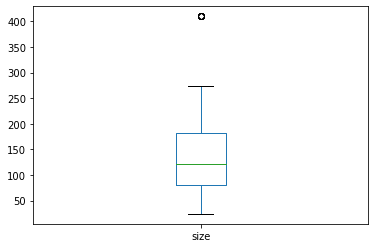

In [13]:
df['size'].plot(kind = 'box')

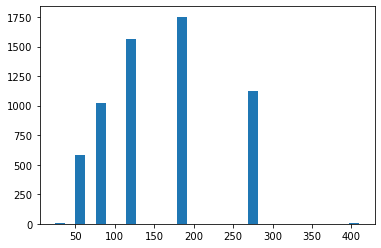

In [14]:
plt.hist(df['size'],bins=30)
plt.show()

### So, from analysis i will resize all the image in 100 x 100 form and remove image with size less or equal 54

female    0.592605
male      0.407395
Name: gender, dtype: float64


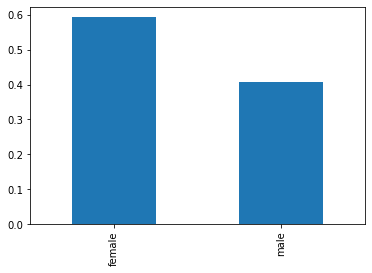

In [15]:
df_new = df[df['size'] > 60]
string = df_new['path'][0]
def gender(string):
    try:

        return string.split('_')[0].split('/')[-1]
    except:
        return None

df['gender'] = df['path'].apply(gender)

print(df['gender'].value_counts(normalize=True))
df['gender'].value_counts(normalize=True).plot(kind='bar')
plt.show()

1. 60 % Female are there and rest 40% are male
2. All the images size is greater than or equal to 81

conclusion : resizing all the image in df_new to 100 x 100 array

## Resize image

In [16]:
def resize_img(path_to_resize):
    try:
        # step - 1: read image
        img = cv2.imread(path_to_resize)
        # step - 2: convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step -3: resize into 100 x 100 array
        size = gray.shape[0]
        if size >= 100: #shrink
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA) # SHRINK
        else: # enlarge
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_CUBIC) # ENLARGE
        # step -4: Flatten Image (1x10,000)
        return gray_re.flatten()
    except:
        return None

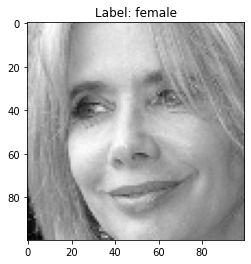

In [17]:
df_new['gender'] = df_new['path'].apply(gender)

# structuring function
df_new['structure_data'] = df_new['path'].apply(resize_img)

# copy and expand their columns
df1 = df_new['structure_data'].apply(pd.Series)
df1 = df1.astype(float)

df2 = pd.concat((df_new['gender'],df1),axis=1)

plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title("Label: "+df2.loc[0]['gender'])
plt.show()

In [18]:
pickle.dump(df2,open('./data/dataframe_images_100_100.pickle','wb'))

# Data Preprocessing

In [19]:
# load pickle data
df = pickle.load(open('./data/dataframe_images_100_100.pickle','rb'))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5467 entries, 0 to 6057
Columns: 10001 entries, gender to 9999
dtypes: float64(10000), object(1)
memory usage: 417.2+ MB


In [21]:
# checking for missing values
df.isnull().sum()

gender    0
0         0
1         0
2         0
3         0
         ..
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

# Data Preprocessing
- Remove missing
- Data Normalization (min max scalling)

In [22]:
# removing missing values
df.dropna(axis=0,inplace=True)
df.isnull().sum()

gender    0
0         0
1         0
2         0
3         0
         ..
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

In [23]:
# split the into two parts
X = df.iloc[:,1:].values # inpendent features
y = df.iloc[:,0].values # dependent
X.shape

(5467, 10000)

# Min Max Scalling 
## Xnorm = $\frac {x - minValue} { maxValue - minValue}$

In [24]:
Xnorm = X / X.max()
Xnorm

array([[0.7372549 , 0.70588235, 0.72156863, ..., 0.47058824, 0.45882353,
        0.43529412],
       [0.1254902 , 0.09411765, 0.1254902 , ..., 0.14117647, 0.24313725,
        0.06666667],
       [0.08627451, 0.11764706, 0.15294118, ..., 0.74509804, 0.69411765,
        0.69411765],
       ...,
       [0.09803922, 0.09803922, 0.10196078, ..., 0.11764706, 0.12156863,
        0.13333333],
       [0.08235294, 0.10588235, 0.12156863, ..., 0.07843137, 0.08627451,
        0.09803922],
       [0.01568627, 0.01176471, 0.00784314, ..., 0.35294118, 0.35294118,
        0.36470588]])

In [25]:
# female = 1, male = 0
y_norm = np.where(y=='female',1,0)

In [26]:
# save x and y in numpy zip
np.savez('./data/data_10000_norm.npz',Xnorm,y_norm)

# Eigen Images

In [27]:
# load numpy zip
data = np.load('./data/data_10000_norm.npz')

X  = data['arr_0'] # independent features
y = data['arr_1'] # target value

print(X.shape, y.shape)

X1 = X - X.mean(axis=0)
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
x_pca = pca.fit_transform(X1)
print(x_pca.shape)

eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

(5467, 10000) (5467,)
(5467, 5467)


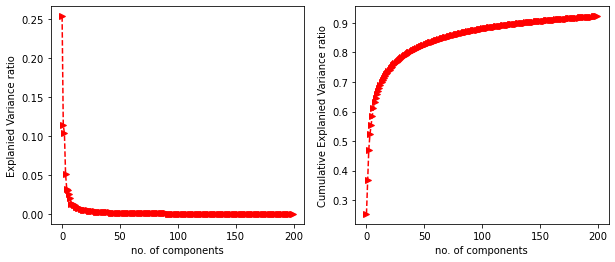

In [28]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Explanied Variance ratio')

plt.subplot(1,2,2)
plt.plot(eigen_ratio_cum[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explanied Variance ratio')

plt.show()

conclusion: using elbow method, consider number of compoenent is between 25 - 30
> since if I consider component between 25 to 30 the explained variance is around 75 % 
so, in order to get min 80% variance I am considering 55 compoenents

In [29]:
pca_55 = PCA(n_components=55,whiten=True,svd_solver='auto')
x_pca_55 = pca_55.fit_transform(X1)
print(x_pca_55.shape)

# saving pca
pickle.dump(pca_55,open('./model/pca_55.pickle','wb'))

# consider 55 compnent and inverse transform
x_pca_inv = pca_55.inverse_transform(x_pca_55)

print(x_pca_inv.shape)

(5467, 55)
(5467, 10000)


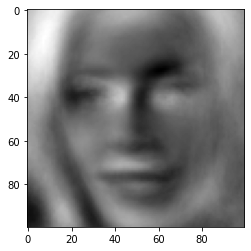

In [30]:
# consider one image (one row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

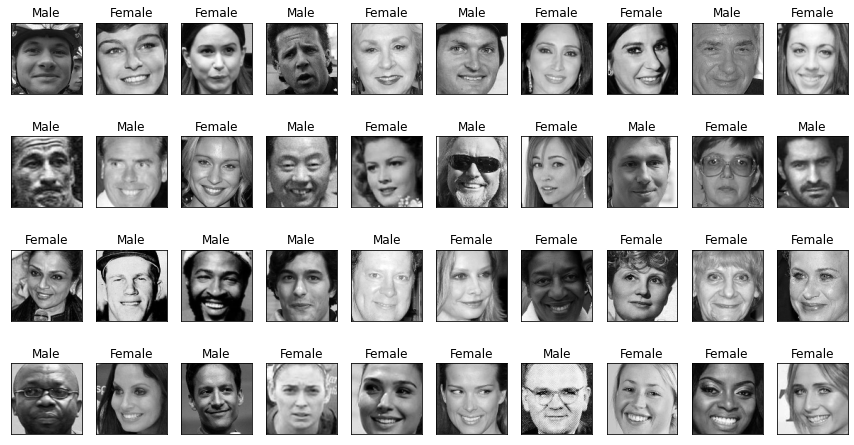

====================Eigen Images====================


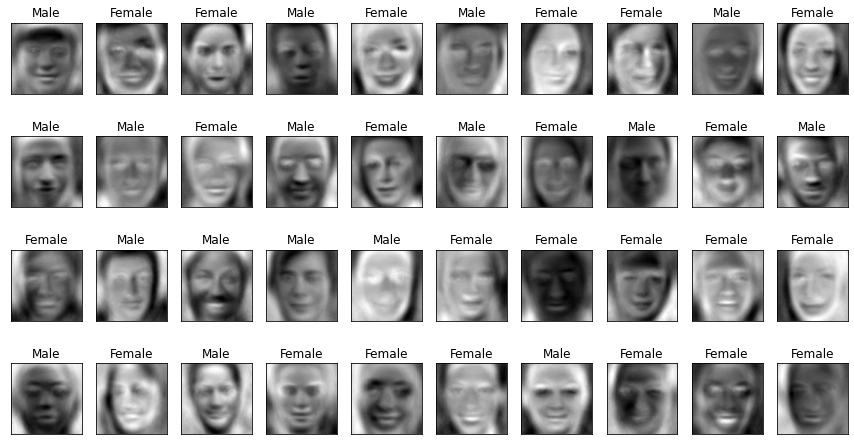

In [31]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)
pics = np.random.randint(0,5463,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [34]:
# saving 
np.savez('./data/data_pca_55_y_mean.pickle',x_pca_55,y,X.mean(axis=0))

# Training a Machine Learning Model

In [35]:
data = np.load('./data/data_pca_55_y_mean.pickle.npz')

X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)

model.fit(x_train,y_train)
print('model trained sucessfully')

# score
model.score(x_test,y_test)

(4373, 55)
(1094, 55)
(4373,)
(1094,)
model trained sucessfully


0.7915904936014625

# Model Evaluation
- Confusion Matrix
- Classification Report 
- Kappa Score
- ROC and AUC (probability)

## Confusion Matrix

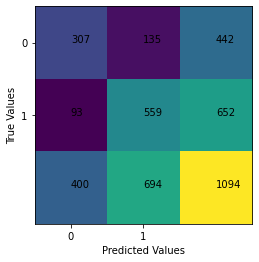

In [36]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) # proability
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

## Classification Report

In [38]:
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.767500,0.694570,0.729216,442.00000
female,0.805476,0.857362,0.830609,652.00000
accuracy,0.791590,0.791590,0.791590,0.79159
macro avg,0.786488,0.775966,0.779913,1094.00000
weighted avg,0.790133,0.791590,0.789644,1094.00000


## Kappa

In [39]:
metrics.cohen_kappa_score(y_test,y_pred)

0.5605094194676045

## ROC and AUC

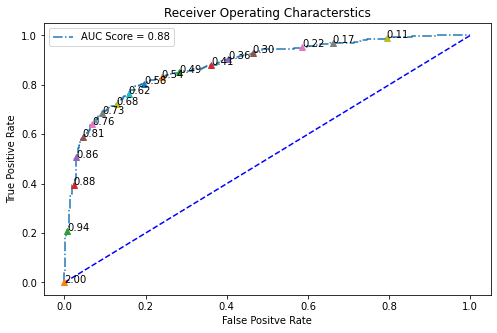

In [40]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

# Hyper Parameter Tuning

In [41]:
model_tune = SVC()

param_grid = {'C':[1,10,20],
             'kernel':['rbf','poly'],
             'gamma':[0.003,0.004,0.005,0.006],
             'coef0':[0,1],
             }

model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)

model_grid.fit(X,y)

print(model_grid.best_params_)
print(model_grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=1, coef0=0, gamma=0.003, kernel=rbf ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=1, coef0=0, gamma=0.003, kernel=rbf, total=   1.1s
[CV] C=1, coef0=0, gamma=0.003, kernel=rbf ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ............ C=1, coef0=0, gamma=0.003, kernel=rbf, total=   1.1s
[CV] C=1, coef0=0, gamma=0.003, kernel=rbf ...........................
[CV] ............ C=1, coef0=0, gamma=0.003, kernel=rbf, total=   1.1s
[CV] C=1, coef0=0, gamma=0.003, kernel=rbf ...........................
[CV] ............ C=1, coef0=0, gamma=0.003, kernel=rbf, total=   1.1s
[CV] C=1, coef0=0, gamma=0.003, kernel=rbf ...........................
[CV] ............ C=1, coef0=0, gamma=0.003, kernel=rbf, total=   1.1s
[CV] C=1, coef0=0, gamma=0.003, kernel=poly ..........................
[CV] ........... C=1, coef0=0, gamma=0.003, kernel=poly, total=   1.3s
[CV] C=1, coef0=0, gamma=0.003, kernel=poly ..........................
[CV] ........... C=1, coef0=0, gamma=0.003, kernel=poly, total=   1.1s
[CV] C=1, coef0=0, gamma=0.003, kernel=poly ..........................
[CV] ........... C=1, coef0=0, gamma=0.003, kernel=poly, total=   1.1s
[CV] C=1, coef0=0, gamma=0.003, kernel=poly ..........................
[CV] .

[CV] ........... C=1, coef0=1, gamma=0.004, kernel=poly, total=   0.9s
[CV] C=1, coef0=1, gamma=0.005, kernel=rbf ...........................
[CV] ............ C=1, coef0=1, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=1, coef0=1, gamma=0.005, kernel=rbf ...........................
[CV] ............ C=1, coef0=1, gamma=0.005, kernel=rbf, total=   1.1s
[CV] C=1, coef0=1, gamma=0.005, kernel=rbf ...........................
[CV] ............ C=1, coef0=1, gamma=0.005, kernel=rbf, total=   1.1s
[CV] C=1, coef0=1, gamma=0.005, kernel=rbf ...........................
[CV] ............ C=1, coef0=1, gamma=0.005, kernel=rbf, total=   1.0s
[CV] C=1, coef0=1, gamma=0.005, kernel=rbf ...........................
[CV] ............ C=1, coef0=1, gamma=0.005, kernel=rbf, total=   1.1s
[CV] C=1, coef0=1, gamma=0.005, kernel=poly ..........................
[CV] ........... C=1, coef0=1, gamma=0.005, kernel=poly, total=   0.8s
[CV] C=1, coef0=1, gamma=0.005, kernel=poly ..........................
[CV] .

[CV] .......... C=10, coef0=0, gamma=0.006, kernel=poly, total=   1.1s
[CV] C=10, coef0=0, gamma=0.006, kernel=poly .........................
[CV] .......... C=10, coef0=0, gamma=0.006, kernel=poly, total=   1.1s
[CV] C=10, coef0=0, gamma=0.006, kernel=poly .........................
[CV] .......... C=10, coef0=0, gamma=0.006, kernel=poly, total=   1.1s
[CV] C=10, coef0=1, gamma=0.003, kernel=rbf ..........................
[CV] ........... C=10, coef0=1, gamma=0.003, kernel=rbf, total=   1.1s
[CV] C=10, coef0=1, gamma=0.003, kernel=rbf ..........................
[CV] ........... C=10, coef0=1, gamma=0.003, kernel=rbf, total=   1.1s
[CV] C=10, coef0=1, gamma=0.003, kernel=rbf ..........................
[CV] ........... C=10, coef0=1, gamma=0.003, kernel=rbf, total=   1.1s
[CV] C=10, coef0=1, gamma=0.003, kernel=rbf ..........................
[CV] ........... C=10, coef0=1, gamma=0.003, kernel=rbf, total=   1.1s
[CV] C=10, coef0=1, gamma=0.003, kernel=rbf ..........................
[CV] .

[CV] .......... C=20, coef0=0, gamma=0.004, kernel=poly, total=   1.1s
[CV] C=20, coef0=0, gamma=0.004, kernel=poly .........................
[CV] .......... C=20, coef0=0, gamma=0.004, kernel=poly, total=   1.1s
[CV] C=20, coef0=0, gamma=0.004, kernel=poly .........................
[CV] .......... C=20, coef0=0, gamma=0.004, kernel=poly, total=   1.1s
[CV] C=20, coef0=0, gamma=0.004, kernel=poly .........................
[CV] .......... C=20, coef0=0, gamma=0.004, kernel=poly, total=   1.1s
[CV] C=20, coef0=0, gamma=0.004, kernel=poly .........................
[CV] .......... C=20, coef0=0, gamma=0.004, kernel=poly, total=   1.1s
[CV] C=20, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=20, coef0=0, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=20, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=20, coef0=0, gamma=0.005, kernel=rbf, total=   1.3s
[CV] C=20, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] .

[CV] ........... C=20, coef0=1, gamma=0.006, kernel=rbf, total=   1.2s
[CV] C=20, coef0=1, gamma=0.006, kernel=rbf ..........................
[CV] ........... C=20, coef0=1, gamma=0.006, kernel=rbf, total=   1.3s
[CV] C=20, coef0=1, gamma=0.006, kernel=poly .........................
[CV] .......... C=20, coef0=1, gamma=0.006, kernel=poly, total=   1.4s
[CV] C=20, coef0=1, gamma=0.006, kernel=poly .........................
[CV] .......... C=20, coef0=1, gamma=0.006, kernel=poly, total=   1.4s
[CV] C=20, coef0=1, gamma=0.006, kernel=poly .........................
[CV] .......... C=20, coef0=1, gamma=0.006, kernel=poly, total=   1.4s
[CV] C=20, coef0=1, gamma=0.006, kernel=poly .........................
[CV] .......... C=20, coef0=1, gamma=0.006, kernel=poly, total=   1.3s
[CV] C=20, coef0=1, gamma=0.006, kernel=poly .........................
[CV] .......... C=20, coef0=1, gamma=0.006, kernel=poly, total=   1.3s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  4.5min finished


{'C': 10, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}
0.787999752454961


In [42]:
# WIth best parameter buil ML Model
model_best = SVC(C=10,kernel='rbf',gamma= 0.005, probability=True)
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.8190127970749543

## Confusion Matrix

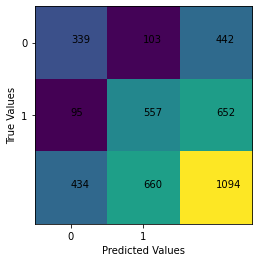

In [43]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) # proability
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

## Classification Report

In [44]:
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.781106,0.766968,0.773973,442.000000
female,0.843939,0.854294,0.849085,652.000000
accuracy,0.819013,0.819013,0.819013,0.819013
macro avg,0.812523,0.810631,0.811529,1094.000000
weighted avg,0.818553,0.819013,0.818738,1094.000000


## Kappa

In [45]:
metrics.cohen_kappa_score(y_test,y_pred)

0.623078957625703

## ROC and AUC

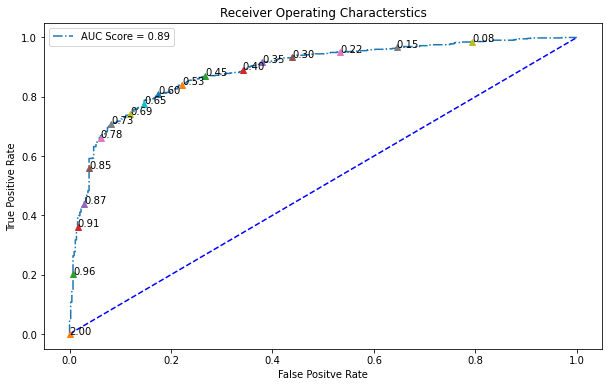

In [46]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

In [47]:
# save our machine learning model
pickle.dump(model_best,open('model_svm.pickle','wb'))
pickle.dump(mean,open('./model/mean_preprocess.pickle','wb'))

# Make Pipeline Model

In [48]:
# load all the models
haar = cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')
# pickle files
mean  = pickle.load(open('./model/mean_preprocess.pickle','rb'))
model_svm  = pickle.load(open('./model/model_svm.pickle','rb'))
model_pca  = pickle.load(open('./model/pca_55.pickle','rb'))

print('Model loaded sucessfully')

Model loaded sucessfully


In [49]:
gender_pre = ['Male','Female']
font = cv2.FONT_HERSHEY_SIMPLEX

In [54]:
# test data
test_data_path = './data/male_000281.jpg'
color = 'bgr'
# step-1: read image
img = cv2.imread(test_data_path)

def pipeline_model(img,color='rgb'):
    # step-2: convert into gray scale
    if color == 'bgr':
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # step-3: crop the face (using haar cascase classifier)
    faces = haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),5) # drawing rectangle
        roi = gray[y:y+h,x:x+w] # crop image
        # step - 4: normalization (0-1)
        roi = roi / 255.0
        # step-5: resize images (100,100)
        if roi.shape[1] > 100:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
        else:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
        # step-6: Flattening (1x10000)
        roi_reshape = roi_resize.reshape(1,10000) # 1,-1
        # step-7: subptract with mean
        roi_mean = roi_reshape - mean
        # step -8: get eigen image
        eigen_image = model_pca.transform(roi_mean)
        # step -9: pass to ml model (svm)
        results = model_svm.predict_proba(eigen_image)[0]
        # step -10:
        predict = results.argmax() # 0 or 1 
        score = results[predict]
        # step -11:
        text = "%s : %0.2f"%(gender_pre[predict],score)
        cv2.putText(img,text,(x,y),font,1,(255,255,255),5)
    return img

In [51]:
eig_img = model_pca.inverse_transform(eigen_image)

NameError: name 'eigen_image' is not defined

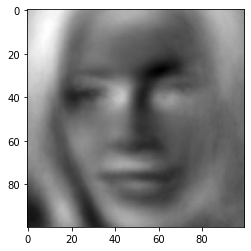

In [139]:
plt.imshow(eig_img.reshape((100,100)),cmap='gray')

In [55]:
test_data_path = './data/male_000281.jpg'
color = 'bgr'
# step-1: read image
img = Image.open(test_data_path) # rgb
# step2: convert into array
img = np.array(img)
# step3: pass to pipeline model
img = pipeline_model(img,color)
plt.imshow(img)

ValueError: X.shape[1] = 55 should be equal to 50, the number of features at training time

# Apply pipepline to Video

In [56]:
cap = cv2.VideoCapture('./data/video.mp4')

while True:
    ret, frame = cap.read() # bgr
    
    if ret == False:
        break
    
    frame = pipeline_model(frame,color='bgr')
    
    cv2.imshow('Gender Detector',frame)
    if cv2.waitKey(10) == ord('s'): # press s to exit  --#esc key (27), 
        break
        
cv2.destroyAllWindows()
cap.release()

ValueError: X.shape[1] = 55 should be equal to 50, the number of features at training time